# SC1015 DSAI Project:
### [Toxic Comment Classification Challenge Dataset from Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview)

In [2]:
## Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Setup : Import the Dataset
The dataset `train.csv` is in CSV format, hence we use the `read_csv` function from Pandas, and take a quick look at the data using the head function.

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Entries with all 0 under the 6 categories are considered as non-toxic.</br> 

In [10]:
# Check the shape of object type in the dataset using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Data Cleaning

check null value in dataset, need to clean dataset if there is missing values

In [11]:
#find the null values of the df
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'

In [12]:
import re
import string

# Remove all '\n' in the string and replace it with a space
rm_breakline = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
rm_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(rm_breakline).map(rm_non_ascii)

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r Why the edits made under my user...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r More\r I can't make any real suggestions o...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


make sure columns: toxic, severe_toxic, obscene, threat, insult, and identity_hate have no other value other than 0 and 1

In [13]:
print("Max Value")
#find the max value to every column
print(df[df.columns[2:]].max())
print("\nMin Value")
#find the min value to every column
print(df[df.columns[2:]].min())

Max Value
toxic            1
severe_toxic     1
obscene          1
threat           1
insult           1
identity_hate    1
dtype: int64

Min Value
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## Exploratory Data Analysis

comparing the percentage and total number of comments categorized as toxic, severe_toxic, obscene, threat, insult, and identity_hate to those of normal comments

In [14]:
category=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

for i in category:
    print('-----------\t'+i+"\t-----------")
    print(df[i].value_counts().rename_axis('comment count'+' (0 - non-'+i+'   1 - '+i+')'))
    print('')
    print(df[i].value_counts(normalize=True).rename_axis('ratio'+' (0 - non-'+i+'   1 - '+i+')'))
    print('')

-----------	toxic	-----------
comment count (0 - non-toxic   1 - toxic)
0    144277
1     15294
Name: toxic, dtype: int64

ratio (0 - non-toxic   1 - toxic)
0    0.904156
1    0.095844
Name: toxic, dtype: float64

-----------	severe_toxic	-----------
comment count (0 - non-severe_toxic   1 - severe_toxic)
0    157976
1      1595
Name: severe_toxic, dtype: int64

ratio (0 - non-severe_toxic   1 - severe_toxic)
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64

-----------	obscene	-----------
comment count (0 - non-obscene   1 - obscene)
0    151122
1      8449
Name: obscene, dtype: int64

ratio (0 - non-obscene   1 - obscene)
0    0.947052
1    0.052948
Name: obscene, dtype: float64

-----------	threat	-----------
comment count (0 - non-threat   1 - threat)
0    159093
1       478
Name: threat, dtype: int64

ratio (0 - non-threat   1 - threat)
0    0.997004
1    0.002996
Name: threat, dtype: float64

-----------	insult	-----------
comment count (0 - non-insult   1 - insult)

In [15]:
sumOfTypes=df.iloc[:,2:].sum()
sumOfTypes

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

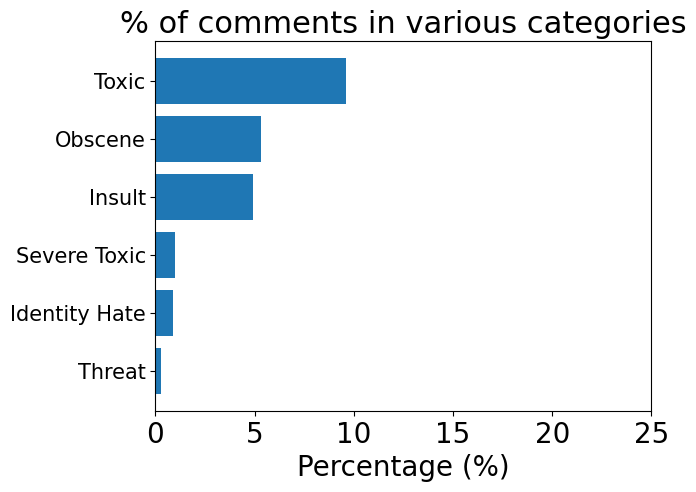

In [16]:
# Create a bar graph 
dfRowCnt = len(df)
sum_tox = df['toxic'].sum() / dfRowCnt * 100
sum_sev = df['severe_toxic'].sum() / dfRowCnt * 100
sum_obs = df['obscene'].sum() / dfRowCnt * 100
sum_thr = df['threat'].sum() / dfRowCnt * 100
sum_ins = df['insult'].sum() / dfRowCnt * 100
sum_ide = df['identity_hate'].sum() / dfRowCnt * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

Split dataset into 6 categories: toxic, severe_toxic, obscene, threat, insult, and identity_hate. df_category stucture = {id,comment,categotry}

In [17]:
df_toxic = df.loc[:,['id','comment_text','toxic']]
df_severe = df.loc[:,['id','comment_text','severe_toxic']]
df_obscene = df.loc[:,['id','comment_text','obscene']]
df_threat = df.loc[:,['id','comment_text','threat']]
df_insult = df.loc[:,['id','comment_text','insult']]
df_hate = df.loc[:,['id','comment_text','identity_hate']]

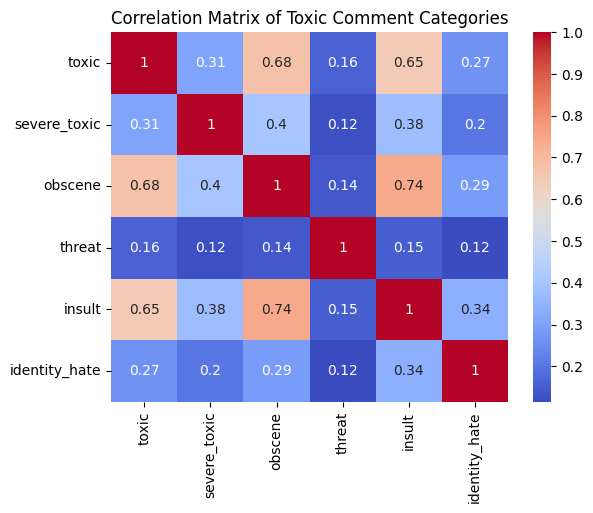

In [18]:

# Create a new dataframe with the count of comments for each category
category_counts = df.iloc[:, 2:].sum()



# Calculate the co-occurrence rate between each pair of categories
correlation = df.iloc[:, 2:].corr()

# Create a heatmap of the correlation matrix
sb.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Toxic Comment Categories')
plt.show()


#### Creating WordCloud<br>
show frequently used words in each category

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [20]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

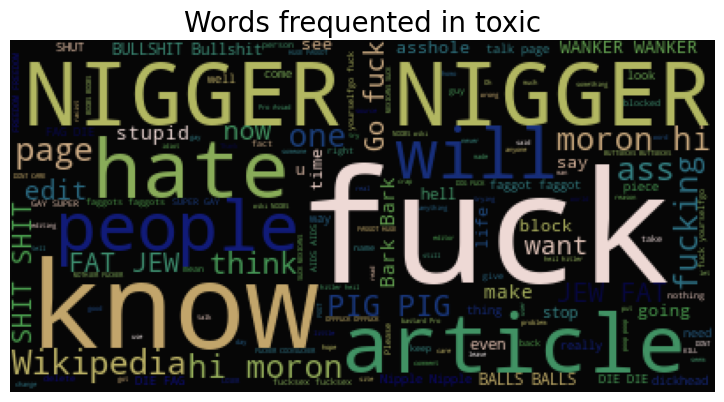

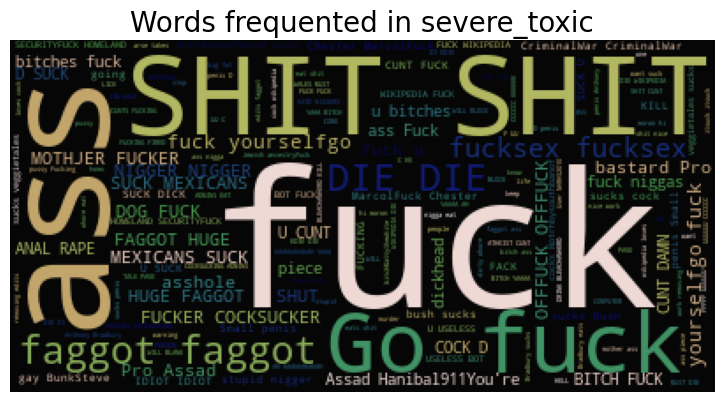

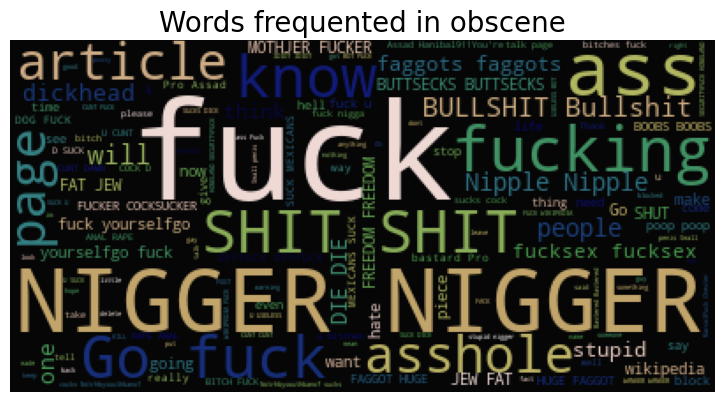

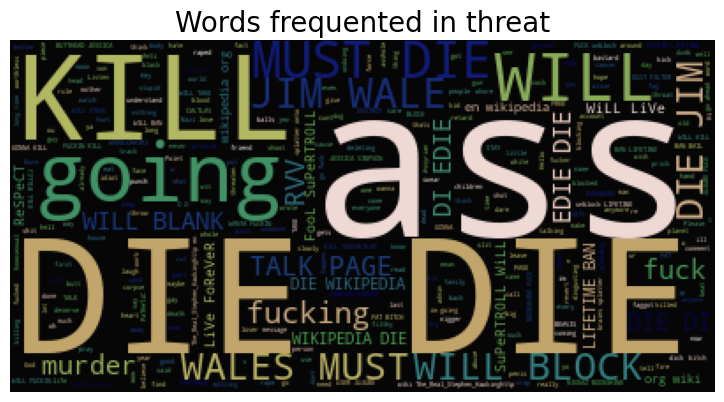

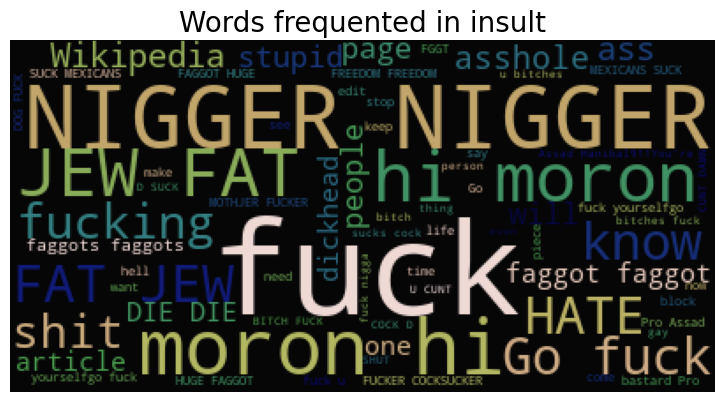

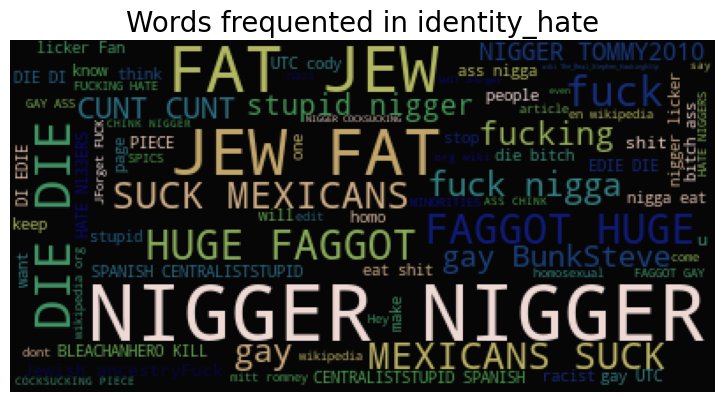

In [21]:
category_df=[df_toxic,df_severe,df_obscene,df_threat,df_insult,df_hate]

for i in range(len(category_df)):
    wordcloud(category_df[i],category_df[i].columns[2])

### create network text analysis

In [22]:
import networkx as nx

In [23]:
G = nx.Graph()
G.add_nodes_from(['toxic', 'severe_toxic', 'obscene',
                 'threat', 'insult', 'identity_hate'])


In [ ]:
# Define the correlation matrix
correlation = {
    ('toxic', 'severe_toxic'): 0.31,
    ('toxic', 'obscene'): 0.68,
    ('toxic', 'threat'): 0.16,
    ('toxic', 'insult'): 0.65,
    ('toxic', 'identity_hate'): 0.27,
    ('severe_toxic', 'obscene'): 0.4,
    ('severe_toxic', 'threat'): 0.12,
    ('severe_toxic', 'insult'): 0.38,
    ('severe_toxic', 'identity_hate'): 0.2,
    ('obscene', 'threat'): 0.14,
    ('obscene', 'insult'): 0.74,
    ('obscene', 'identity_hate'): 0.29,
    ('threat', 'insult'): 0.15,
    ('threat', 'identity_hate'): 0.12,
    ('insult', 'identity_hate'): 0.34
}

# Add edges to the graph based on the correlation matrix
for edge, weight in correlation.items():
    G.add_edge(edge[0], edge[1], weight=weight)


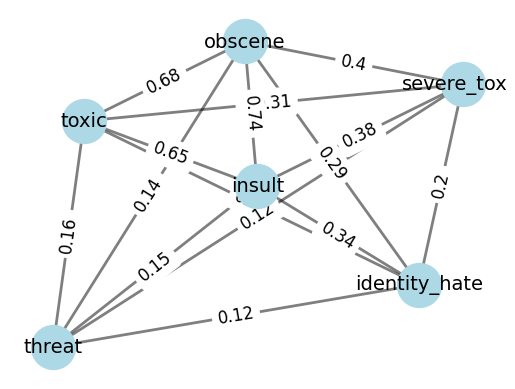

In [ ]:
# Define the positions of the nodes
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)

# Add node labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Add edge labels
labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=labels, font_size=12, font_family='sans-serif')

# Show the graph
plt.axis('off')
plt.show()


In [4]:
import networkx as nx

# Load text data from CSV
data = df.loc[:, 'comment_text']


# Create graph representation
G = nx.Graph()
for idx, comment_text in data.items():
    words = comment_text.split()
    for i, w1 in enumerate(words):
        for j, w2 in enumerate(words):
            if i != j and w1 != w2:
                if not G.has_node(w1):
                    G.add_node(w1)
                if not G.has_node(w2):
                    G.add_node(w2)
                if not G.has_edge(w1, w2):
                    G.add_edge(w1, w2)

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=[
                       degree_centrality[n] for n in G.nodes()], cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos)
plt.show()


### create ML pipeline

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

### Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Train Model

In [ ]:
#history = model.fit(train, epochs=10, validation_data=val)
history = model.fit(train, epochs=1, validation_data=val)

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

In [ ]:
df.columns[2:]

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

## Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
%pip install gradio jinja2

In [ ]:
import gradio as gr

In [ ]:
#model.save('toxicity.h5')
model.save('toxicity2.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)